In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = '../igblast_data/SRR4431764merged.igblast'

In [3]:
df = pd.read_csv(path,sep='\t')

In [4]:
df['sequence_length'] = df['sequence'].apply(len)

In [5]:
# filters the data where 'vj_in_frame' is 'T'
df_vj_in_frame = df[df['vj_in_frame'] == 'T']

# prints the number of sequences in the dataset where the V and J genes alignments are in-frame
print(len(df_vj_in_frame['sequence']))

1043036


In [6]:
# filters the data where 'complete_vdj' is 'T'
df_complete_vdj = df[df['complete_vdj'] == 'T']

# prints the number of sequences in the dataset where their alignment spans the etire V(D)J region
print(len(df_complete_vdj['sequence']))

804993


In [7]:
# filters the data where 'complete_vdj' and 'vj_in_frame' are both 'T'
df_complete_vdj_and_vj_in_frame = df[(df['complete_vdj'] == 'T') & (df['vj_in_frame'] == 'T')]

# prints the number of sequences in the dataset where both 'complete_vdj' and 'vj_in_frame' are 'T'
print(len(df_complete_vdj['sequence']))

804993


Note that the most restrictive label is 'complete_vdj'. In this data set, all sequences where 'complete_vdj' equals 'T' also have 'vj_in_frame' equal to 'T'

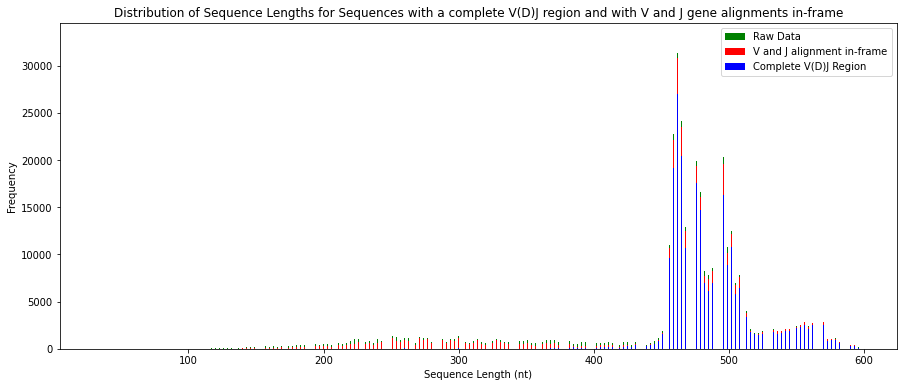

In [42]:
complete_vj_seq_len_counts = df_complete_vdj['sequence_length'].value_counts().sort_index()
vj_in_frame_seq_len_counts = df_vj_in_frame['sequence_length'].value_counts().sort_index()
df_seq_len_counts = df['sequence_length'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(15, 6))

# Plot the distribution of sequence lengths for all sequences
ax.bar(df_seq_len_counts.index, df_seq_len_counts.values, width=0.2, color='green', label='Raw Data')

# Plot the distribution of sequence lengths for sequences with V and J genes in-frame (in red)
ax.bar(vj_in_frame_seq_len_counts.index, vj_in_frame_seq_len_counts.values, width=0.2, color='red', label='V and J alignment in-frame')

# Plot the distribution of sequence lengths for sequences with complete V(D)J region (in blue)
ax.bar(complete_vj_seq_len_counts.index, complete_vj_seq_len_counts.values, width=0.2, color='blue', label='Complete V(D)J Region')

ax.set_xlabel('Sequence Length (nt)')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Sequence Lengths for Sequences with a complete V(D)J region and with V and J gene alignments in-frame')
ax.legend()

plt.show()
plt.close()

Note that the most significant difference is with sequences with a length (approximately) less than 400 nt. We can see that most sequences with less than 400nt have their V and J genes in-frame but do not have a complete V(D)J region

In [48]:
set_unique_sequences = {}

for seq in df['sequence']:
    if (seq in set_unique_sequences):
        set_unique_sequences[seq] += 1
    else:
        set_unique_sequences[seq] = 1

print(len(set_unique_sequences))

686220


In [10]:
freq_unique_sequence = {}

for key in set_unique_sequences:
    if (len(key) in freq_unique_sequence):
        freq_unique_sequence[len(key)] += 1
    else:
        freq_unique_sequence[len(key)] = 1

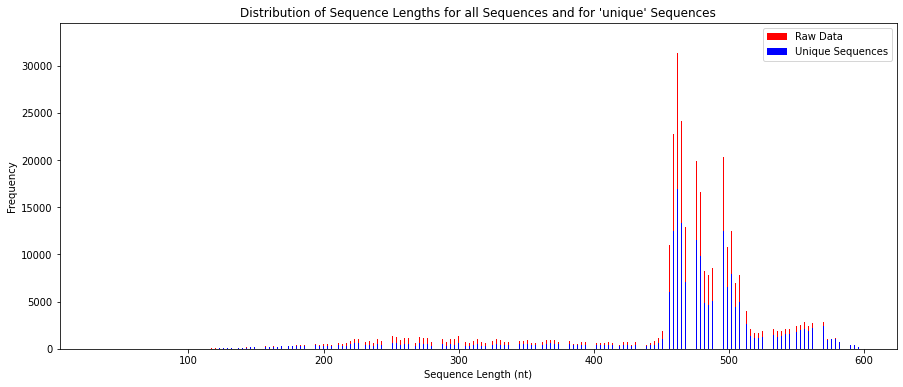

In [47]:
fig, ax = plt.subplots(figsize=(15, 6))

# Plot the distribution of sequence lengths for all sequences
ax.bar(df_seq_len_counts.index, df_seq_len_counts.values, width=0.2, color='red', label='Raw Data')

# Plot the distribution of sequence lengths for unique sequences (not counting duplicates in our distribution)
ax.bar(freq_unique_sequence.keys(), freq_unique_sequence.values(), width = 0.2, color='blue', label='Unique Sequences')

ax.set_xlabel('Sequence Length (nt)')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Sequence Lengths for all Sequences and for \'unique\' Sequences')
ax.legend()

plt.show()
plt.close()

Note that 'unique' in this case means that we are not considering duplicates for our distribution. This does not mean that our distribution is not considering sequences with duplicates but that duplicates are not being added into our total frequency